In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ansur-ii/ANSUR II MALE Public.csv
/kaggle/input/ansur-ii/Hotzman_2011_ANSURIII_Measurements_a548497.pdf
/kaggle/input/ansur-ii/ANSUR II FEMALE Public.csv
/kaggle/input/ansur-ii/Gordon_2012_ANSURII_a611869.pdf
/kaggle/input/ansur-ii/ANSUR II Databases Overview.pdf


<h1><center><span style="color:LightCoral; opacity: 1;">HELLO EVERYONE!</span></center></h1>

# Quick Review Of Dataset

***Explanations that may be required from a document prepared about data:***<br>
- The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012. It's comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.<br>
    - Reach Complete Data Dict via : <a href="https://www.kaggle.com/seshadrikolluri/ansur-ii?select=ANSUR+II+Databases+Overview.pdf" style="color:DeepPink;">ANSUR II Databases Overview.pd</a>
    
***About Dataset Shape***<br>
- The ANSUR II working databases contain <span style="color:DeepPink">93 anthropometric</span> measurements which were directly measured, and <span style="color:DeepPink">15 demographic/administrative</span> variables explained below. The <span style="color:DeepPink">ANSUR II Male</span> working database contains a total sample of <span style="color:DeepPink">4,082</span> subjects text. The <span style="color:DeepPink">ANSUR II Female</span>  working database contains a total sample of <span style="color:DeepPink">1,986</span> subjects. The databases are reported in the associated spreadsheet files:<br>
    - a. “ANSUR II MALE Public.csv”<br>
    - b. “ANSUR II FEMALE Public.csv”.
    
***Where to ingest the data?***<br>
- <span style="color:DeepPink">***DataWorld Links***</span>:
    - Soldiers Male : <a href="https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr" style="color:DeepPink;">Soldiers Male (DataWorld)</a>
    - Soldiers Female : <a href="https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq" style="color:DeepPink;">Soldiers Female (DataWorld)</a>
- <span style="color:DeepPink">***Kaggle Links***</span>:
    - Soldiers Male : <a href="https://www.kaggle.com/seshadrikolluri/ansur-ii?select=ANSUR+II+MALE+Public.csv" style="color:DeepPink;">Soldiers Male (Kaggle)</a>
    - Soldiers Female : <a href="https://www.kaggle.com/seshadrikolluri/ansur-ii?select=ANSUR+II+FEMALE+Public.csv" style="color:DeepPink;">Soldiers Female (Kaggle)</a>

# EDA

### Basic Libraries For EDA

- For now, we will only import a few libraries to do the EDA process. 
- If you want to understand what these libraries are, I strongly suggest you consult **Uncle GOOGLE**.

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import variation

# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

### Getting the Data

- Ingest Data from links above
- <span style="color:DeepPink">If you get a different insight from Kaggle data, please write it in the **comments**.</span>

In [3]:
# I used dataworld platform. It's up to you. 
df_m = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1')
df_f= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

### Let's Start to Beginner Friendly EDA

**Before EDA, our community gave us some tips, please respect them for better results.**
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
- Find unusual value in Weightlbs

<span style="color:DeepPink">Of course, we will do the additional manipulations we want without being limited to just these instructions.</span>

In [4]:
# Ladies first
df_f.head().T

,0,1,2,3,4
SubjectId,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
...,...,...,...,...,...
DODRace,2,3,1,2,1
Age,26,21,23,22,45
Heightin,61,64,68,66,63
Weightlbs,142,120,147,175,195


In [5]:
df_m.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
...,...,...,...,...,...
DODRace,1,1,2,1,2
Age,41,35,42,31,21
Heightin,71,68,68,66,77
Weightlbs,180,160,205,175,213


<span style="color:DeepPink">There are lots of columns. Lets look at the shape and info of them in one row.</span>

In [6]:
df_f.shape,df_m.shape

((1986, 108), (4082, 108))

In [7]:
df_f.info(),df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


(None, None)

Now we can easily see that, both of them have same number of columns.<br>
<span style="color:DeepPink">Let's concat each other.</span>

In [8]:
df = pd.concat([df_m,df_f])

<span style="color:DeepPink">Let's apply all the EDA codes so far for our newly created dataset.</span>

In [9]:
df.shape

(6068, 109)

As you can see, the number of columns has increased, so not all of our columns are the same. **Calm down!** I took a look at for you and carefully examined the two datasets. Only one column name is different. Let's fix it and reconcat it and start our EDA process.<br>
<span style="color:DeepPink">Let's make necessary treatment :)</span>

In [10]:
df_f = df_f.rename(columns = {"SubjectId":"subjectid"})

Ok! We solved the problem!!!

In [11]:
df = pd.concat([df_m,df_f])
df.shape

(6068, 108)

Keep Going! We have a lot of jobs to do.

In [12]:
df.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
...,...,...,...,...,...
DODRace,1,1,2,1,2
Age,41,35,42,31,21
Heightin,71,68,68,66,77
Weightlbs,180,160,205,175,213


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


<span style="color:DeepPink">Let's check is there any duplcate or NaN value inside our dataset</span> 

In [14]:
df.isnull().sum().any()

True

In [15]:
# Another term of "df.isnull().sum().any()"
df.isnull().any().any()

True

In [16]:
df.duplicated().sum()

0

Now let's take a look at what nan values are.

In [17]:
df.isnull().sum()

subjectid                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 108, dtype: int64

From the output of the above code, you already saw that there are Nan values in the "Ethnicity" column.<br>
<span style="color:DeepPink">But now let's handle NaN values by writing a generic code that drops NaN values.</span>

In [18]:
NaN_list =[]
for columns in df.columns:
    if df[columns].isnull().sum()>0:
        print("{name} = {qty}".format(name = columns, qty = df[columns].isnull().sum()))
        NaN_list.append(columns)

Ethnicity = 4647


In [19]:
NaN_list

['Ethnicity']

In [20]:
df = df.drop(NaN_list, axis=1)

In [21]:
df.isnull().sum().any()

False

Now, the second thing that caught my eye in the Dataset is; <span style="color:DeepPink">"SubjectNumericRace"</span> and <span style="color:DeepPink">"DODRace"</span> columns

- <span style="color:DeepPink">**SubjectNumericRace**</span>: a single or multi-digit code indicating a subject’s self-reported race or races (verified through interview). Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other
- <span style="color:DeepPink">**DODRace**</span>: Department of Defense Race; a single digit indicating a subject’s self-reported preferred single race where selecting multiple races is not an option. This variable is intended to be comparable to the Defense Manpower Data Center demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other

In [22]:
df[["DODRace","SubjectNumericRace"]]

,DODRace,SubjectNumericRace
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
...,...,...
1981,3,3
1982,3,3
1983,2,2
1984,3,3


I've decided to drop subjectnumericrace column.

In [23]:
df.drop("SubjectNumericRace", axis = 1, inplace = True)

<span style="color:DeepPink">There was an instruction above:</span>
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [24]:
df.DODRace.value_counts(dropna = False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [25]:
# Alternative code that does the same:
# df = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") | (df["DODRace"] == "Hispanic")]
df = df[df["DODRace"].isin([1,2,3])]
df.DODRace.value_counts(dropna = False)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [26]:
df.shape

(5769, 106)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64


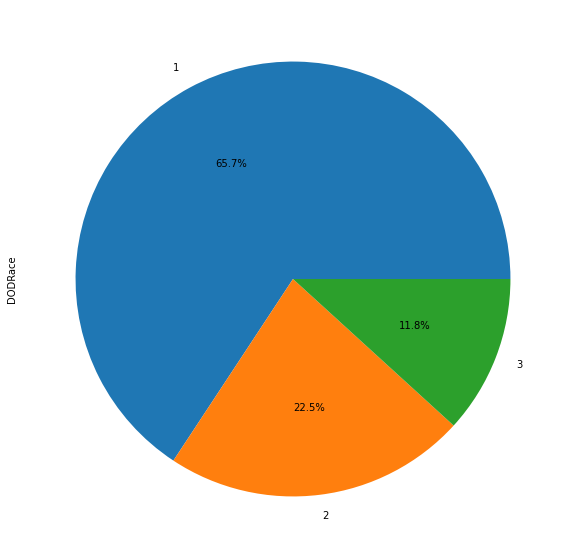

In [27]:
print(df["DODRace"].value_counts());
df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

<span style="color:DeepPink">Now let's look at the columns that need to be considered, such as Wightlbs, and do the necessary operations.</span>

#### Weightlbs and Heightin columns:

I've found 2 columns with the same information about weight in my dataset. It's up to you to decide whether to drop this repeating column or not. But I didn't drop it.

In [28]:
df[['Weightlbs','weightkg']]

,Weightlbs,weightkg
0,180,815
1,160,726
2,205,929
3,175,794
4,213,946
...,...,...
1981,180,832
1982,150,717
1983,168,762
1984,133,632


In [29]:
# df.drop(["weightkg"], axis = 1, inplace=True)

If you want, you can set a limit on the Weightlbs and Heightin columns and then drop the values outside the limit. When I do the necessary research (The minimum and maximum values of the height and weight of a healthy individual who can become a soldier), I guess the codes like these might be good:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:DeepPink">df = df[(df['Weightlbs'] >= 100) & (df['Weightlbs'] <= 270)]</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:DeepPink">df = df[(df['Heightin'] >= 59) & (df['Heightin'] <= 80)]</span>

<span style="color:DeepPink">**Important warning!**</span><br>
You have to be very careful while dropping data. Because each value is like a golden for our ML algorithm.<br>
That's why I just did the following and proceeded without further tinkering with my Weightlbs and Heightin columns. Please indicate your different experiences in the comments.

In [30]:
for columns in df.select_dtypes(include=[np.number]).columns:
    if df[columns].min() == 0:
        print(columns)

Weightlbs


In [31]:
df["Weightlbs"].argmin()

824

In [32]:
df.iloc[824][["Weightlbs","Heightin"]]

Weightlbs     0
Heightin     71
Name: 866, dtype: object

In [33]:
df.drop(index = df["Weightlbs"].argmin(), inplace=True)

In [34]:
# Don't forget to drop indexes. Unnecessary column
df.reset_index(drop=True, inplace=True)

#### Let's examine object (non numeric) columns

<span style="color:DeepPink">You can make these codes generic by taking them to your own personal codebooks. There is no copyright :D </span>

In [35]:
df.select_dtypes(exclude=[np.number]).head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Male
Date,4-Oct-10,4-Oct-10,4-Oct-10,12-Oct-10,12-Oct-10
Installation,Fort Hood,Fort Hood,Fort Hood,Fort Hood,Fort Hood
Component,Regular Army,Regular Army,Regular Army,Regular Army,Regular Army
Branch,Combat Arms,Combat Support,Combat Support,Combat Service Support,Combat Service Support
PrimaryMOS,19D,68W,68W,88M,92G
SubjectsBirthLocation,North Dakota,New York,New York,Wisconsin,North Carolina
WritingPreference,Right hand,Left hand,Left hand,Right hand,Right hand


In [36]:
# to find how many unique values object features have
for columns in df.select_dtypes(exclude=[np.number]).columns:
    print(f"{columns} has {df[columns].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 281 unique value
SubjectsBirthLocation has 136 unique value
WritingPreference has 3 unique value


<span style="color:DeepPink">Let's create our non-numeric list, which will cause our data to swell when we apply the get dummies operation and will not yield any meaningful results, and perform our drop operation.</span>

First of all, it is useful to look at how our "Component" and "Branch" features explain our data with the following groupings:

In [37]:
df.groupby(["Component"])["DODRace"].value_counts()

Component            DODRace
Army National Guard  1          1854
                     2           499
                     3           253
Army Reserve         1           114
                     2            52
                     3            41
Regular Army         1          1822
                     2           747
                     3           385
Name: DODRace, dtype: int64

In [38]:
df.groupby(["Component","Branch"])["DODRace"].value_counts()

Component            Branch                  DODRace
Army National Guard  Combat Arms             1          623
                                             2           79
                                             3           74
                     Combat Service Support  1          917
                                             2          312
                                             3          142
                     Combat Support          1          314
                                             2          108
                                             3           37
Army Reserve         Combat Arms             1            5
                                             3            1
                     Combat Service Support  1           82
                                             3           30
                                             2           24
                     Combat Support          2           28
                                             1 

In [39]:
drop_list_nonnumeric = ["Date", "Installation", "Component","PrimaryMOS"]
df.drop(drop_list_nonnumeric, axis=1, inplace=True)

In [40]:
df.shape

(5767, 102)

#### Let's examine numeric columns

In [41]:
df.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
...,...,...,...,...,...
DODRace,1,1,2,1,2
Age,41,35,42,31,21
Heightin,71,68,68,66,77
Weightlbs,180,160,205,175,213


In [42]:
df.drop("subjectid", axis = 1, inplace = True)

#### Correlation

<span style="color:DeepPink">Now let's look at the correlational relations and then find our features that can be multicollinearity and do the necessary operations.</span><br>
Let's assign our dataset to a temporary dataset (in order not to corrupt the origin dataset) and create a generic code that shows our correlation ranges. <span style="color:DeepPink">Do not forget;</span> Correlation values can also be negative. So let's set up our code like this:

- <span style="color:DeepPink">HeatMap Code:</span><br>
&nbsp;&nbsp;&nbsp;&nbsp;plt.figure(figsize=(20,20))<br>
&nbsp;&nbsp;&nbsp;&nbsp;sns.heatmap(df.corr(), cmap ="viridis")<br>
- But I just put the codes as a comment to inform you without running the heatmap.

My function below dropped all my features that could be correlating outside the range of <span style="color:DeepPink">0.9 - 0.1</span> and <span style="color:DeepPink">-0.9 and 0.1.</span>

In [43]:
df_temp = df.corr()

count = "done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                # print(f"multicolinearity alert in between {col} - {i}")
print("Number of strong corelated features:", count)

Number of strong corelated features: done


Let's create a DataFrame that consists of corr results

In [44]:
df_col = pd.DataFrame([feature, collinear], index=["feature","collinear"]).T
df_col

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
...,...,...
295,Heightin,chestheight
296,Heightin,stature
297,Heightin,suprasternaleheight
298,Heightin,waistheightomphalion


In [45]:
df_col.value_counts("feature")

feature
kneeheightsitting                 19
iliocristaleheight                15
tenthribheight                    15
waistheightomphalion              15
cervicaleheight                   15
axillaheight                      15
crotchheight                      14
suprasternaleheight               13
kneeheightmidpatella              12
chestheight                       12
tibialheight                      11
acromialheight                    11
stature                           10
poplitealheight                   10
span                               9
trochanterionheight                9
lateralfemoralepicondyleheight     7
Heightin                           7
buttockheight                      7
sleeveoutseam                      6
forearmhandlength                  5
radialestylionlength               4
weightkg                           4
forearmcenterofgriplength          3
functionalleglength                3
waistcircumference                 3
bideltoidbreadth              

<span style="color:DeepPink">*If you wish, you can also perform the above operations with your own personal codes.*</span><br>
Let's prepare our data and start getting results from our models without drowning in correlational relations.

#### Last Adjustment of EDA's

The last thing to do: We must change the target column of our model , as categorically. Because in ML models, of the target column consists of numbers, the models may make mistakes in the weightings.

In [46]:
df["DODRace"] = df.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic"})
df.DODRace.value_counts()

White       3790
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

# DATA Preprocessing

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [48]:
X= df.drop("DODRace",axis=1)
X = pd.get_dummies(data=X,drop_first=True)
y= df.DODRace

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6, stratify =y)

In [50]:
scaler =MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

**first**<span style="color:DeepPink"> **.fit(train)**</span> --> **second**<span style="color:DeepPink"> **.predict(test)**</span> --> **third**<span style="color:DeepPink"> **.predict(train)**</span> --> **fourth**<span style="color:DeepPink"> **cross_val**</span> --> **fifth**<span style="color:DeepPink"> **GridSearchCV**</span> --> **sixth**<span style="color:DeepPink"> **ROC - AUC**</span>

# 1. Logistic model

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

test scores 
--------------
[[239  11  10]
 [  7 107  22]
 [ 16  97 645]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154



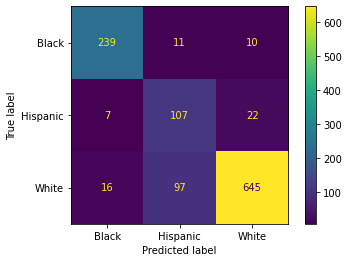

In [52]:
log_model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=6)

log_model.fit(X_train,y_train)

y_pred = log_model.predict(X_test)

print("test scores","\n--------------")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(log_model,X_test,y_test,values_format='.0f')

___

train scores 
--------------
[[ 969   41   28]
 [  21  456   66]
 [  66  339 2627]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.55      0.84      0.66       543
       White       0.97      0.87      0.91      3032

    accuracy                           0.88      4613
   macro avg       0.81      0.88      0.83      4613
weighted avg       0.91      0.88      0.89      4613



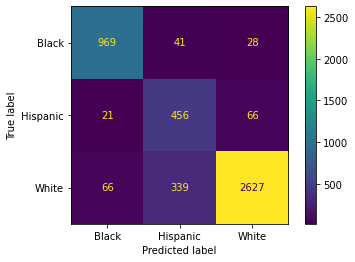

In [53]:
y_pred = log_model.predict(X_train)
print("train scores","\n--------------")
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(log_model,X_train,y_train);

___

<span style="color:DeepPink">Let's make some differences one some parameters.</span>

Below is our function that performs **cross validation** according to the "f1 score".

In [54]:
from sklearn.model_selection import cross_val_score, cross_validate

In [55]:
f1score = make_scorer(f1_score, average="weighted")
model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=6)
scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = f1score, n_jobs = -1)
print([round(i, 4) for i in scores], "\n")
print(f" f1score : %{scores.mean()*100:.2f}, std : %{scores.std()*100:.3f} \n")

[0.8603, 0.8756, 0.8673, 0.864, 0.8698] 

 f1score : %86.74, std : %0.521 



___

<span style="color:DeepPink">Now let's run our **GridsearchCV** code, which gives f1 scores in a single target label "Hispanic".</span><br>
But first, I have to explain what <span style="color:DeepPink">**GridSearchCV**</span> does; 
- It gives results both with hyperparams in grid_param and by cross validation.

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
f1_Hispanic =  make_scorer(f1_score, average=None, labels=["Hispanic"] )

In [58]:
param_grid = { "class_weight" : ["balanced", None],
               'penalty': ["l1","l2"],
               'solver' : ['saga','lbfgs'],
             }

In [59]:
model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=6)
log_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring=f1_Hispanic, refit=True,n_jobs=-1)

In [60]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.1min finished


GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, random_state=6),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'], 'solver': ['saga', 'lbfgs']},
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [61]:
log_model_grid.best_params_

{'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}

[[237   2  21]
 [  5  73  58]
 [  6  15 737]]
              precision    recall  f1-score   support

       Black       0.96      0.91      0.93       260
    Hispanic       0.81      0.54      0.65       136
       White       0.90      0.97      0.94       758

    accuracy                           0.91      1154
   macro avg       0.89      0.81      0.84      1154
weighted avg       0.90      0.91      0.90      1154



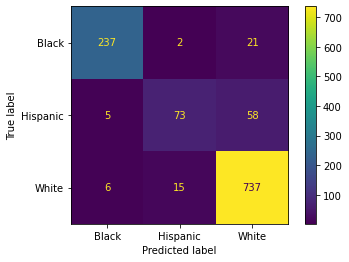

In [62]:
y_pred = log_model_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(log_model_grid,X_test,y_test);

<span style="color:DeepPink">*If you want better results from ML models: You need to look at and understand the **HYPERPARAM** parameters of each model.*</span>

In [63]:
from sklearn.metrics import roc_curve, auc

Our def function to be used in drawing the roc curve for the multiclass target label is as follows:

In [64]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

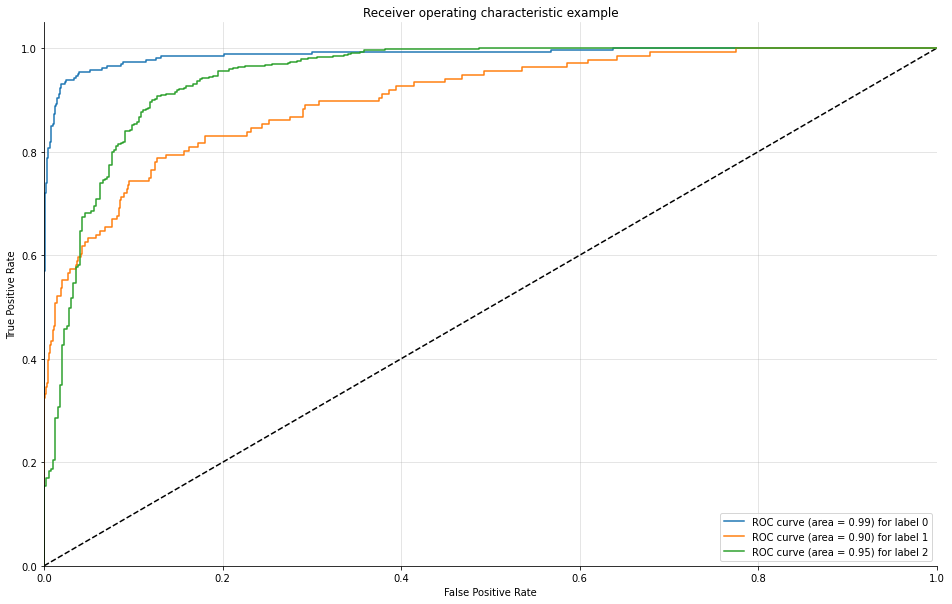

In [65]:
plot_multiclass_roc(log_model_grid, X_test, y_test, n_classes=3, figsize=(16, 10));

# 2. SVM --> SVC Model

In [66]:
from sklearn.svm import SVC

test scores 
--------------
[[239   9  12]
 [  7 107  22]
 [ 11 104 643]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       260
    Hispanic       0.49      0.79      0.60       136
       White       0.95      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154



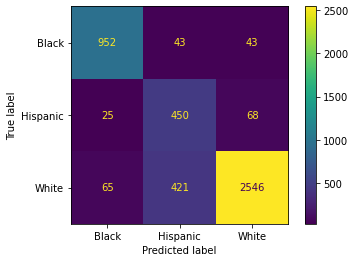

In [67]:
svm_model = SVC(class_weight="balanced")

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("test scores","\n--------------")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svm_model,X_train,y_train);

___

train scores 
--------------
[[ 952   43   43]
 [  25  450   68]
 [  65  421 2546]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92      1038
    Hispanic       0.49      0.83      0.62       543
       White       0.96      0.84      0.90      3032

    accuracy                           0.86      4613
   macro avg       0.79      0.86      0.81      4613
weighted avg       0.89      0.86      0.87      4613



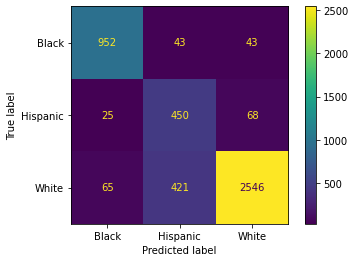

In [68]:
y_pred = svm_model.predict(X_train)

print("train scores","\n--------------")

print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(svm_model,X_train,y_train);

___

___

In [69]:
param_grid = {'C': np.linspace(200,400,5),
              'decision_function_shape' : ['ovr','ovo'],
              'gamma': ["scale", "auto", 1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight':["balanced",None]
             }

In [70]:
model = SVC(class_weight="balanced")
svm_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring=f1_Hispanic, refit=True,n_jobs=-1)

In [71]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   55.0s


[CV] class_weight=balanced, penalty=l1, solver=saga ..................
[CV]  class_weight=balanced, penalty=l1, solver=saga, score=0.572, total=  42.7s
[CV] class_weight=balanced, penalty=l1, solver=saga ..................
[CV]  class_weight=balanced, penalty=l1, solver=saga, score=0.637, total=  38.6s
[CV] class_weight=balanced, penalty=l1, solver=lbfgs .................
[CV]  class_weight=balanced, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] class_weight=balanced, penalty=l1, solver=lbfgs .................
[CV]  class_weight=balanced, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] class_weight=balanced, penalty=l1, solver=lbfgs .................
[CV]  class_weight=balanced, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] class_weight=balanced, penalty=l1, solver=lbfgs .................
[CV]  class_weight=balanced, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] class_weight=balanced, penalty=l1, solver=lbfgs .................
[CV]  class_weight=ba

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  4.2min



[CV] C=200.0, class_weight=balanced, decision_function_shape=ovo, gamma=0.01, kernel=rbf 
[CV]  C=200.0, class_weight=balanced, decision_function_shape=ovo, gamma=0.01, kernel=rbf, score=0.588, total=   2.9s
[CV] C=200.0, class_weight=balanced, decision_function_shape=ovo, gamma=0.01, kernel=rbf 
[CV]  C=200.0, class_weight=balanced, decision_function_shape=ovo, gamma=0.01, kernel=rbf, score=0.627, total=   3.1s
[CV] C=200.0, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf 
[CV]  C=200.0, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf, score=0.640, total=   2.6s
[CV] C=200.0, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf 
[CV]  C=200.0, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf, score=0.581, total=   2.7s
[CV] C=200.0, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf 
[CV]  C=200.0, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf, scor

[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  9.4min



[CV] C=300.0, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf 
[CV]  C=300.0, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf, score=0.657, total=   2.7s
[CV] C=300.0, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf 
[CV]  C=300.0, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf, score=0.512, total=   2.8s
[CV] C=300.0, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf 
[CV]  C=300.0, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf, score=0.600, total=   2.8s
[CV] C=300.0, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf 
[CV]  C=300.0, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf, score=0.577, total=   3.2s
[CV] C=300.0, class_weight=balanced, decision_function_shape=ovr, gamma=0.01, kernel=rbf 
[CV]  C=300.0, class_weight=balanced, decision_function_shape=ovr, gamma=0.01, kernel

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 16.7min finished


GridSearchCV(estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': array([200., 250., 300., 350., 400.]),
                         'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01],
                         'kernel': ['rbf']},
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [72]:
svm_model_grid.best_params_

{'C': 400.0,
 'class_weight': None,
 'decision_function_shape': 'ovr',
 'gamma': 'auto',
 'kernel': 'rbf'}

[[237   3  20]
 [  6  76  54]
 [  7  15 736]]
              precision    recall  f1-score   support

       Black       0.95      0.91      0.93       260
    Hispanic       0.81      0.56      0.66       136
       White       0.91      0.97      0.94       758

    accuracy                           0.91      1154
   macro avg       0.89      0.81      0.84      1154
weighted avg       0.91      0.91      0.90      1154



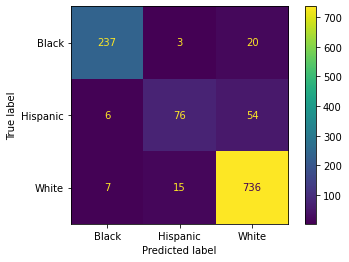

In [73]:
y_pred = svm_model_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svm_model_grid,X_test,y_test);

___

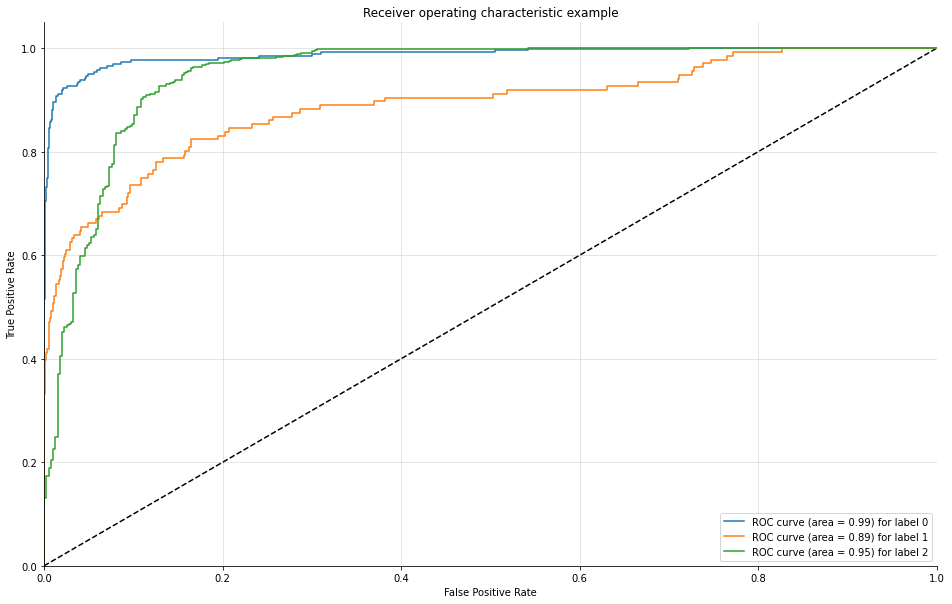

In [74]:
plot_multiclass_roc(svm_model_grid, X_test, y_test, n_classes=3, figsize=(16, 10));

___

# RF (Random Forest)

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf_mod = RandomForestClassifier()

In [77]:
rf_mod.fit(X_train,y_train)

RandomForestClassifier()

[[192   0  68]
 [ 10  19 107]
 [ 12   4 742]]
              precision    recall  f1-score   support

       Black       0.90      0.74      0.81       260
    Hispanic       0.83      0.14      0.24       136
       White       0.81      0.98      0.89       758

    accuracy                           0.83      1154
   macro avg       0.84      0.62      0.65      1154
weighted avg       0.83      0.83      0.79      1154



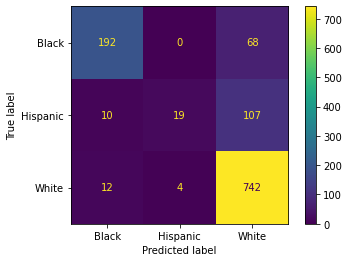

In [78]:
y_pred = rf_mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf_mod,X_test,y_test);

___

[[1038    0    0]
 [   0  543    0]
 [   0    0 3032]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3032

    accuracy                           1.00      4613
   macro avg       1.00      1.00      1.00      4613
weighted avg       1.00      1.00      1.00      4613



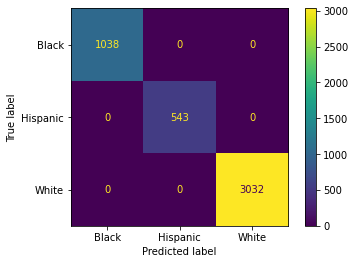

In [79]:
y_pred = rf_mod.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(rf_mod,X_train,y_train);

___

In [80]:
param_grid = {'n_estimators':[400,500],
             'criterion': ["gini","entropy"],
             'max_depth':[10,12,14,16],
             'min_samples_split':[18,20,22],
             'class_weight': ['balanced',None]}

In [81]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model, param_grid, verbose=3, scoring=f1_Hispanic, refit=True,n_jobs=-1)

In [82]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.6min



[CV] C=400.0, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=rbf 
[CV]  C=400.0, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=rbf, score=0.684, total=   2.5s
[CV] C=400.0, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=rbf 
[CV]  C=400.0, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=rbf, score=0.650, total=   2.3s
[CV] C=400.0, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=rbf 
[CV]  C=400.0, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=rbf, score=0.447, total=   8.7s
[CV] C=400.0, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=rbf 
[CV]  C=400.0, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=rbf, score=0.478, total=   8.8s
[CV] C=400.0, class_weight=None, decision_function_shape=ovr, gamma=0.1, kernel=rbf 
[CV]  C=400.0, class_weight=None, decision_function_shape=ovr, gamma=0.1, kernel=rbf, score=0.657, total=   2.7s
[CV] C=400.0,

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  7.9min



[CV]  class_weight=balanced, criterion=gini, max_depth=16, min_samples_split=20, n_estimators=500, score=0.310, total=   8.8s
[CV] class_weight=balanced, criterion=gini, max_depth=16, min_samples_split=22, n_estimators=400 
[CV]  class_weight=balanced, criterion=gini, max_depth=16, min_samples_split=22, n_estimators=400, score=0.342, total=   6.6s
[CV] class_weight=balanced, criterion=gini, max_depth=16, min_samples_split=22, n_estimators=400 
[CV]  class_weight=balanced, criterion=gini, max_depth=16, min_samples_split=22, n_estimators=400, score=0.300, total=   7.5s
[CV] class_weight=balanced, criterion=gini, max_depth=16, min_samples_split=22, n_estimators=500 
[CV]  class_weight=balanced, criterion=gini, max_depth=16, min_samples_split=22, n_estimators=500, score=0.388, total=   8.5s
[CV] class_weight=balanced, criterion=gini, max_depth=16, min_samples_split=22, n_estimators=500 
[CV]  class_weight=balanced, criterion=gini, max_depth=16, min_samples_split=22, n_estimators=500, scor

[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 21.7min



[CV] class_weight=None, criterion=gini, max_depth=10, min_samples_split=20, n_estimators=500 
[CV]  class_weight=None, criterion=gini, max_depth=10, min_samples_split=20, n_estimators=500, score=0.053, total=   7.3s
[CV] class_weight=None, criterion=gini, max_depth=10, min_samples_split=20, n_estimators=500 
[CV]  class_weight=None, criterion=gini, max_depth=10, min_samples_split=20, n_estimators=500, score=0.054, total=   7.6s
[CV] class_weight=None, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=400 
[CV]  class_weight=None, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=400, score=0.053, total=   6.7s
[CV] class_weight=None, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=400 
[CV]  class_weight=None, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=400, score=0.036, total=   5.7s
[CV] class_weight=None, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=400 
[CV]  class_weight=None, criterion=gini, 

[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 38.1min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 16],
                         'min_samples_split': [18, 20, 22],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [83]:
rf_grid_model.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 22,
 'n_estimators': 400}

[[214   8  38]
 [ 13  68  55]
 [ 36  57 665]]
              precision    recall  f1-score   support

       Black       0.81      0.82      0.82       260
    Hispanic       0.51      0.50      0.51       136
       White       0.88      0.88      0.88       758

    accuracy                           0.82      1154
   macro avg       0.73      0.73      0.73      1154
weighted avg       0.82      0.82      0.82      1154



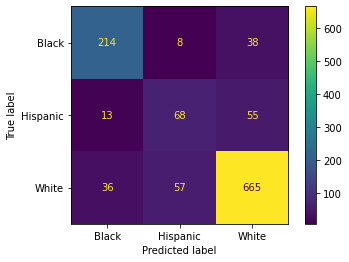

In [84]:
y_pred = rf_grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf_grid_model,X_test,y_test);

___

Our def function to be used in drawing the roc curve for the multiclass target label is as follows (***tree based model***:

In [85]:
def plot_multiclass_roc_for_tree(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

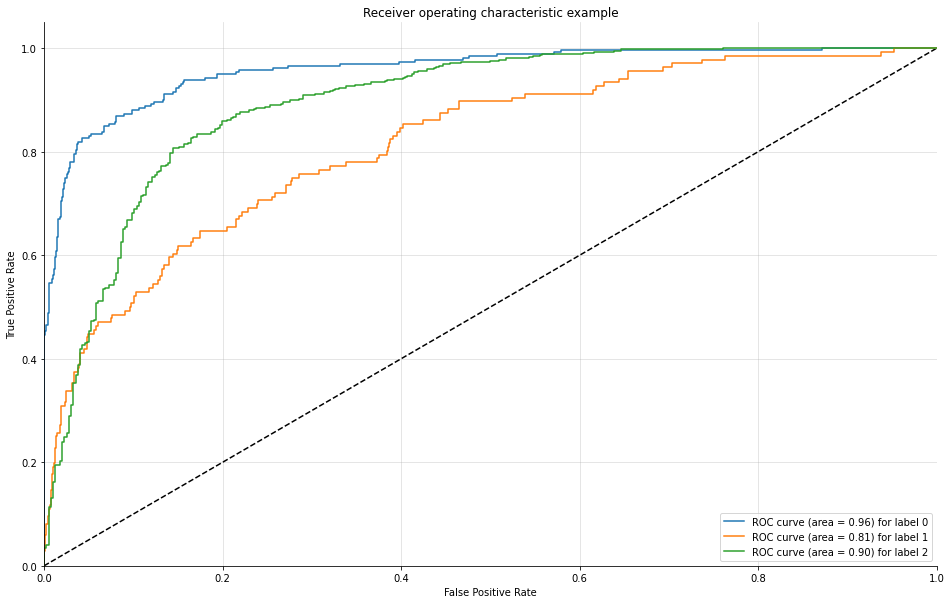

In [86]:
plot_multiclass_roc_for_tree(rf_grid_model, X_test, y_test, n_classes=3, figsize=(16, 10));

# XGBoost Model

In [87]:
from xgboost import XGBClassifier

In [88]:
xgb_model = XGBClassifier()

In [89]:
xgb_model.fit(X_train,y_train)

[03:09:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[[220   3  37]
 [  6  62  68]
 [  9  11 738]]
              precision    recall  f1-score   support

       Black       0.94      0.85      0.89       260
    Hispanic       0.82      0.46      0.58       136
       White       0.88      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.88      0.76      0.80      1154
weighted avg       0.88      0.88      0.87      1154



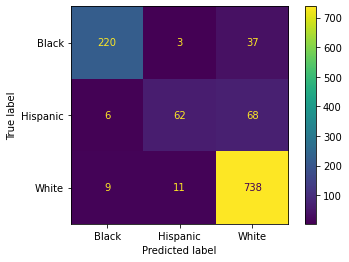

In [90]:
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_model,X_test,y_test);

___

[[1038    0    0]
 [   0  543    0]
 [   0    0 3032]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3032

    accuracy                           1.00      4613
   macro avg       1.00      1.00      1.00      4613
weighted avg       1.00      1.00      1.00      4613



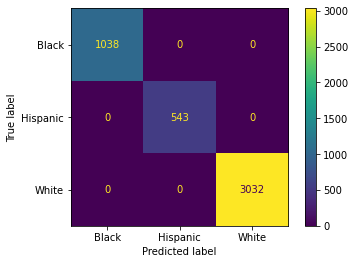

In [91]:
y_pred = xgb_model.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(xgb_model,X_train,y_train);

___

In [92]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.507146  , 0.507146  , 0.507146  , ..., 0.507146  , 0.507146  ,
       2.83179865])

In [93]:
comp = pd.DataFrame(classes_weights)

comp["label"]= y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0       
Black     1.481374    1038
Hispanic  2.831799     543
White     0.507146    3032
Name: 0, dtype: int64

___

In [94]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [95]:
xgb_model = XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring=f1_Hispanic, n_jobs = -1,refit=True, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



[CV] class_weight=None, criterion=entropy, max_depth=12, min_samples_split=20, n_estimators=500 
[CV]  class_weight=None, criterion=entropy, max_depth=12, min_samples_split=20, n_estimators=500, score=0.036, total=  12.1s
[CV] class_weight=None, criterion=entropy, max_depth=12, min_samples_split=20, n_estimators=500 
[CV]  class_weight=None, criterion=entropy, max_depth=12, min_samples_split=20, n_estimators=500, score=0.052, total=  12.8s
[CV] class_weight=None, criterion=entropy, max_depth=12, min_samples_split=22, n_estimators=400 
[CV]  class_weight=None, criterion=entropy, max_depth=12, min_samples_split=22, n_estimators=400, score=0.088, total=   9.8s
[CV] class_weight=None, criterion=entropy, max_depth=12, min_samples_split=22, n_estimators=400 
[CV]  class_weight=None, criterion=entropy, max_depth=12, min_samples_split=22, n_estimators=400, score=0.052, total=   9.7s
[CV] class_weight=None, criterion=entropy, max_depth=12, min_samples_split=22, n_estimators=500 
[CV]  class_we

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.7min



[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5, total=  20.7s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5 
[03:09:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5, total=  10.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1 
[03:10:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1, total=

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 60.0min



[03:59:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1, total=  22.7s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1 
[04:00:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1, total=  48.8s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.5 
[04:01:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used wit

[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 103.3min finished


[04:52:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [96]:
xgb_grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

[[218   2  40]
 [  9  58  69]
 [  6  14 738]]
              precision    recall  f1-score   support

       Black       0.94      0.84      0.88       260
    Hispanic       0.78      0.43      0.55       136
       White       0.87      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.86      0.75      0.79      1154
weighted avg       0.88      0.88      0.87      1154



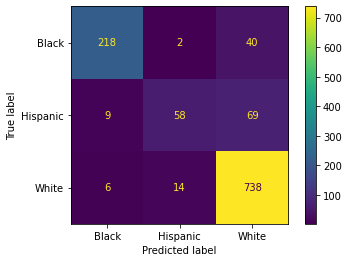

In [97]:
y_pred = xgb_grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_grid_model,X_test,y_test);

___

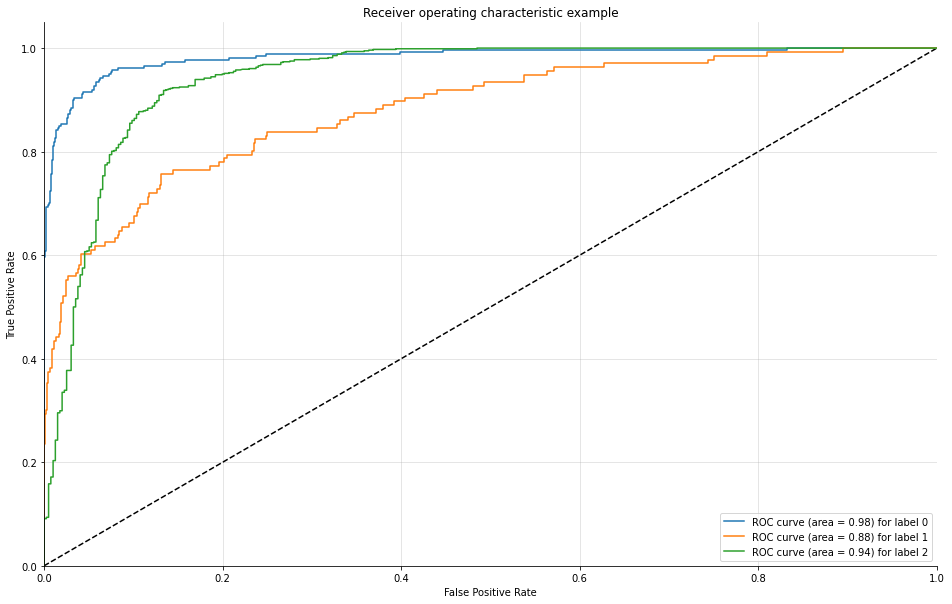

In [98]:
plot_multiclass_roc_for_tree(xgb_grid_model, X_test, y_test, n_classes=3, figsize=(16, 10));

# Lets Make a Prediction with the Final Model

In [99]:
X.describe().loc["mean"]

abdominalextensiondepthsitting      247.265823
acromialheight                     1408.641235
acromionradialelength               328.068320
anklecircumference                  225.204786
axillaheight                       1301.912953
                                      ...     
SubjectsBirthLocation_Wisconsin       0.016993
SubjectsBirthLocation_Wyoming         0.001214
SubjectsBirthLocation_Zambia          0.000173
WritingPreference_Left hand           0.107855
WritingPreference_Right hand          0.881914
Name: mean, Length: 236, dtype: float64

In [100]:
a = pd.DataFrame(X.iloc[205]).T
a

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,SubjectsBirthLocation_Venezuela,SubjectsBirthLocation_Vermont,SubjectsBirthLocation_Virginia,SubjectsBirthLocation_Washington,SubjectsBirthLocation_West Virginia,SubjectsBirthLocation_Wisconsin,SubjectsBirthLocation_Wyoming,SubjectsBirthLocation_Zambia,WritingPreference_Left hand,WritingPreference_Right hand
205,186,1267,300,197,1178,221,181,383,277,229,...,0,0,0,0,0,0,0,0,0,1


In [101]:
a = pd.get_dummies(a)

In [102]:
a = scaler.transform(a)
X_scaled = scaler.fit_transform(X)

In [103]:
final_model = SVC(C=400,class_weight=None,decision_function_shape="ovr", gamma="auto",kernel="rbf" ).fit(X_scaled,y)

In [104]:
y[205]

'Black'

# Using <span style="color:DeepPink">SMOTE</span>

**What is SMOTE?**<br>

&nbsp;&nbsp;&nbsp;SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases.<br>

&nbsp;&nbsp;&nbsp;The new instances are not just copies of existing minority cases; instead, the algorithm takes samples of the feature space for each target class and its nearest neighbors, and generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general.<br>

&nbsp;&nbsp;&nbsp;SMOTE takes the entire dataset as an input, but it increases the percentage of only the minority cases. For example, suppose you have an imbalanced dataset where just 1% of the cases have the target value A (the minority class), and 99% of the cases have the value B. To increase the percentage of minority cases to twice the previous percentage, you would enter 200 for SMOTE percentage in the module's properties.<br>

*Source:* <a href="https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/smote" style="color:DeepPink;">SMOTE</a>

In [105]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [106]:
over = SMOTE(sampling_strategy={"Hispanic": 1250})
under = RandomUnderSampler(sampling_strategy={"White":2800})
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [107]:
#from imblearn.combine import SMOTEENN,SMOTETomek
#ros1 = SMOTETomek()
#ros2 = SMOTEENN()
#X_resampled, y_resampled = ros1.fit_resample(X_train, y_train)

In [108]:
# X_resampled, y_resampled = ros2.fit_resample(X_resampled, y_resampled)

In [109]:
y_resampled.value_counts()

White       2800
Hispanic    1250
Black       1038
Name: DODRace, dtype: int64

In [110]:
y_train.value_counts()

White       3032
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

___

# <center>ADDITIONAL</center>

## SVC Over/ Under Sampling

**Oversampling and undersampling in data analysis**<br>

<span style="color:DeepPink">Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set. These terms are used both in statistical sampling, survey design methodology and in machine learning. Oversampling and undersampling are opposite and roughly equivalent techniques.</span>

In [111]:
param_grid = {'C': np.linspace(50,200,4),
              'decision_function_shape' : ['ovr'], #'ovo'
              'gamma': ["scale", "auto", 1,2],
              'kernel': ['rbf'],
              'class_weight':["balanced",None]}

f1_Hispanic =  make_scorer(f1_score, average=None, labels = ["Hispanic"])
f1_score_weighed = make_scorer(f1_score, average="weighted")

model = SVC()
svm_model_grid = GridSearchCV(model, param_grid, verbose=1, scoring=f1_score_weighed, refit=True,n_jobs=-1)

svm_model_grid.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  9.1min finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 50., 100., 150., 200.]),
                         'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovr'],
                         'gamma': ['scale', 'auto', 1, 2], 'kernel': ['rbf']},
             scoring=make_scorer(f1_score, average=weighted), verbose=1)

In [112]:
svm_model_grid.best_params_

{'C': 100.0,
 'class_weight': None,
 'decision_function_shape': 'ovr',
 'gamma': 'scale',
 'kernel': 'rbf'}

[[235   7  18]
 [  7  86  43]
 [ 11  38 709]]
              precision    recall  f1-score   support

       Black       0.93      0.90      0.92       260
    Hispanic       0.66      0.63      0.64       136
       White       0.92      0.94      0.93       758

    accuracy                           0.89      1154
   macro avg       0.84      0.82      0.83      1154
weighted avg       0.89      0.89      0.89      1154



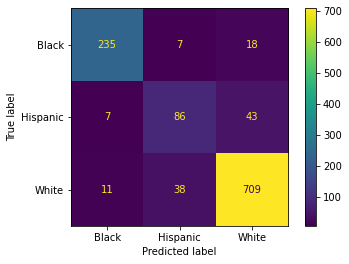

In [113]:
y_pred = svm_model_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svm_model_grid,X_test,y_test);

___

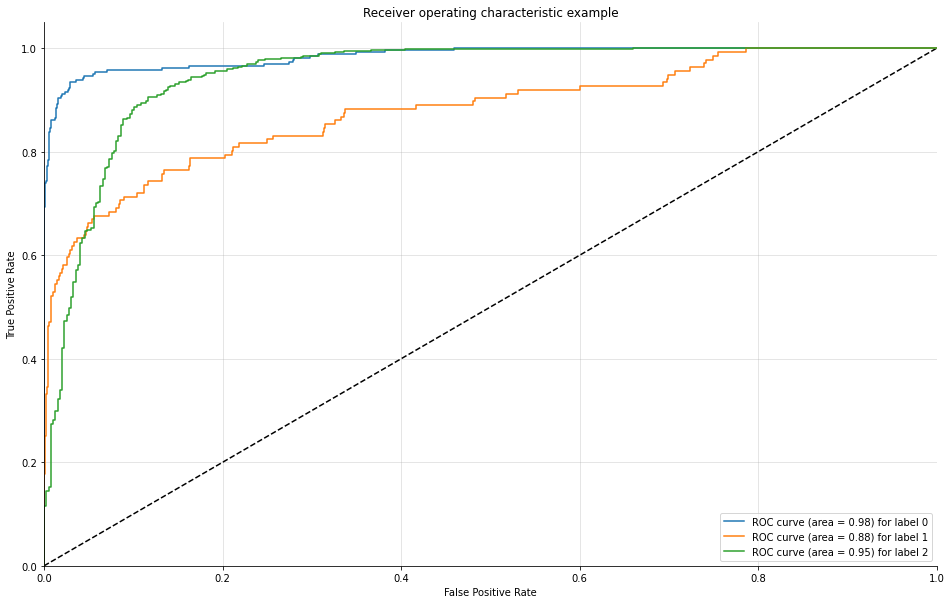

In [114]:
plot_multiclass_roc(svm_model_grid, X_test, y_test, n_classes=3, figsize=(16, 10));

## Xgboost Over/ Under Sampling

In [115]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[6,8],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5],
              "colsample_bytree":[0.5, 1]}

xgb_model = XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring=f1_Hispanic, n_jobs = -1,refit=True, verbose = 2).fit(X_resampled, y_resampled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



[04:42:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5, total=  32.6s
[CV] colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1 
[04:43:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1, total=  39.4s
[CV] colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1 
[04:43:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used wit

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future 


[04:41:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5, total=  40.2s
[CV] colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5 
[04:42:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5, total=  33.2s
[CV] colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5 
[04:43:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric us

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future 

[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.5 
[05:11:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.5, total= 2.3min
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5 
[05:13:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5, total=  33.6s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5 
[05:

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 50.8min finished


[05:53:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [116]:
xgb_grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 300,
 'subsample': 0.5}

[[225   5  30]
 [  9  64  63]
 [ 12  17 729]]
              precision    recall  f1-score   support

       Black       0.91      0.87      0.89       260
    Hispanic       0.74      0.47      0.58       136
       White       0.89      0.96      0.92       758

    accuracy                           0.88      1154
   macro avg       0.85      0.77      0.80      1154
weighted avg       0.88      0.88      0.87      1154



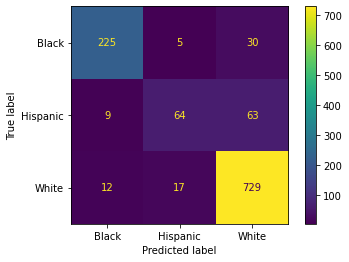

In [117]:
y_pred = xgb_grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_grid_model,X_test,y_test);

## matthews_corrcoef

**What is matthews_corrcoef?**<br>

<span style="color:DeepPink">The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes.</span>

In [118]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.7577589774933099

## cohen_kappa_score

**What is cohen_kappa_score?**<br>

<span style="color:DeepPink">This function computes Cohen's kappa [1], a score that expresses the level of agreement between two annotators on a classification problem. It is defined as. κ = ( p o − p e ) / ( 1 − p e ).</span>

In [119]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.7520569240296753

<h1><center><span style="color:LightCoral; opacity: 1;">THANKS FOR YOUR TIME!</span></center></h1>

<center><img src="https://i.scdn.co/image/ab67616d00001e029b6cd365d38496b580026989" alt="drawing" width="200"/></center>